## Accuracy of Mathieu function characteristic values

Computing Mathieu functions accurately can be difficult and there are many papers on the subject.  Here is a demonstration, taken from a [StackOverflow question](https://stackoverflow.com/questions/28205127/mathieu-characteristics-cross-when-plotted) , showing how the SciPy implementation occasionally struggles.  The NAG implementation computes the correct results as shown in the plot on the right.

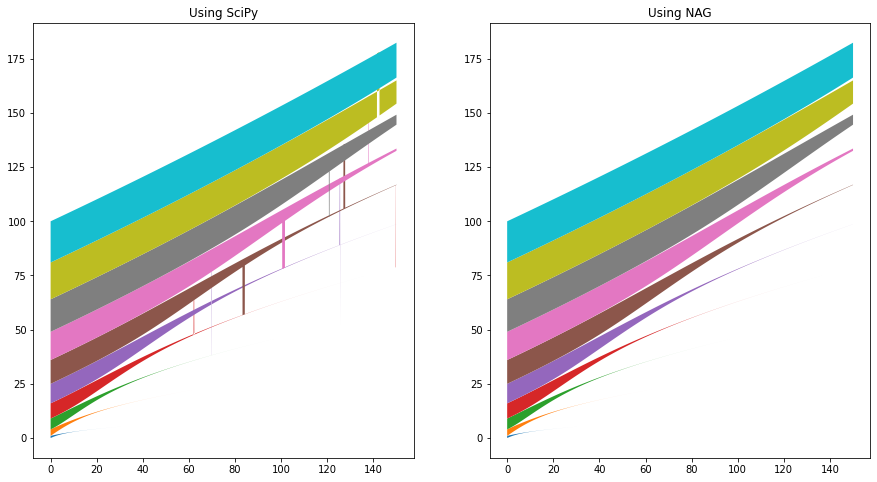

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.special as spfun
from naginterfaces.library import specfun
from matplotlib import pyplot as plt

uplim = 150 #E_rec
Npts = 4000
Nstates = 10
q = np.linspace(0, uplim/4.0, Npts)
EA = np.zeros([Npts,Nstates])
EB = np.zeros([Npts,Nstates])
U = 4*q 

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Using SciPy')

for i in range(Nstates):
    a = spfun.mathieu_a(i,q)
    b = spfun.mathieu_b(i+1,q)
    EA[:,i] = a + 2*q
    EB[:,i] = b + 2*q
    plt.fill_between(U, EA[:,i], EB[:,i])

plt.subplot(1,2,2)
plt.title('Using NAG')

for i in range(Nstates):
    a = [specfun.mathieu_ang_periodic_real(ordval=i, q=qi, parity=0, mode=3).a for qi in q]
    b = [specfun.mathieu_ang_periodic_real(ordval=i+1, q=qi, parity=1, mode=3).a for qi in q]
    EA[:,i] = a + 2*q
    EB[:,i] = b + 2*q 
    plt.fill_between(U, EA[:,i], EB[:,i]) 

plt.show()

# Version information

In [2]:
sp.__version__

'1.8.0'

In [3]:
import naginterfaces as ni
ni.__version__

'28.3.0.1'